# HW_4 DECISION TRESS

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
from scipy import stats
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [51]:
california_housing = fetch_california_housing(as_frame=True)
#california_housing

### 1. Получите данные и загрузите их в рабочую среду.

In [52]:
df = california_housing.frame
X, y = california_housing.data, california_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 2а. Проверте данные на пропуски. Удалите в случае обнаружения

In [53]:
if df.isna().any().any():
    print('Пропуски есть')
else:
    print('Пропусков нет')

Пропусков нет


In [54]:
# Данные не содержат пропусков

#### 2b. Нормализуйте один из признаков

In [55]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
feature_to_normalize = 'MedHouseVal'
scaler = MinMaxScaler()
df[feature_to_normalize] = scaler.fit_transform(df[[feature_to_normalize]])
df[feature_to_normalize]

0        0.902266
1        0.708247
2        0.695051
3        0.672783
4        0.674638
           ...   
20635    0.130105
20636    0.128043
20637    0.159383
20638    0.143713
20639    0.153403
Name: MedHouseVal, Length: 20640, dtype: float64

In [56]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
y_reshaped = y.values.reshape(-1, 1)

est.fit(y_reshaped)
y_binned = est.transform(y_reshaped)
y_bin_edges = y_binned.astype(int)
y = y_bin_edges

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

### 4. Обучите модель регрессии на обучающем множетсве.

In [58]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.40991425622230415

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score

In [59]:
model_test = LinearRegression().fit(X_test,y_test)
model_test.score(X_test,y_test)

0.41096994152796584

### 6. Обучите дерево решений на обучающем множестве. 

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

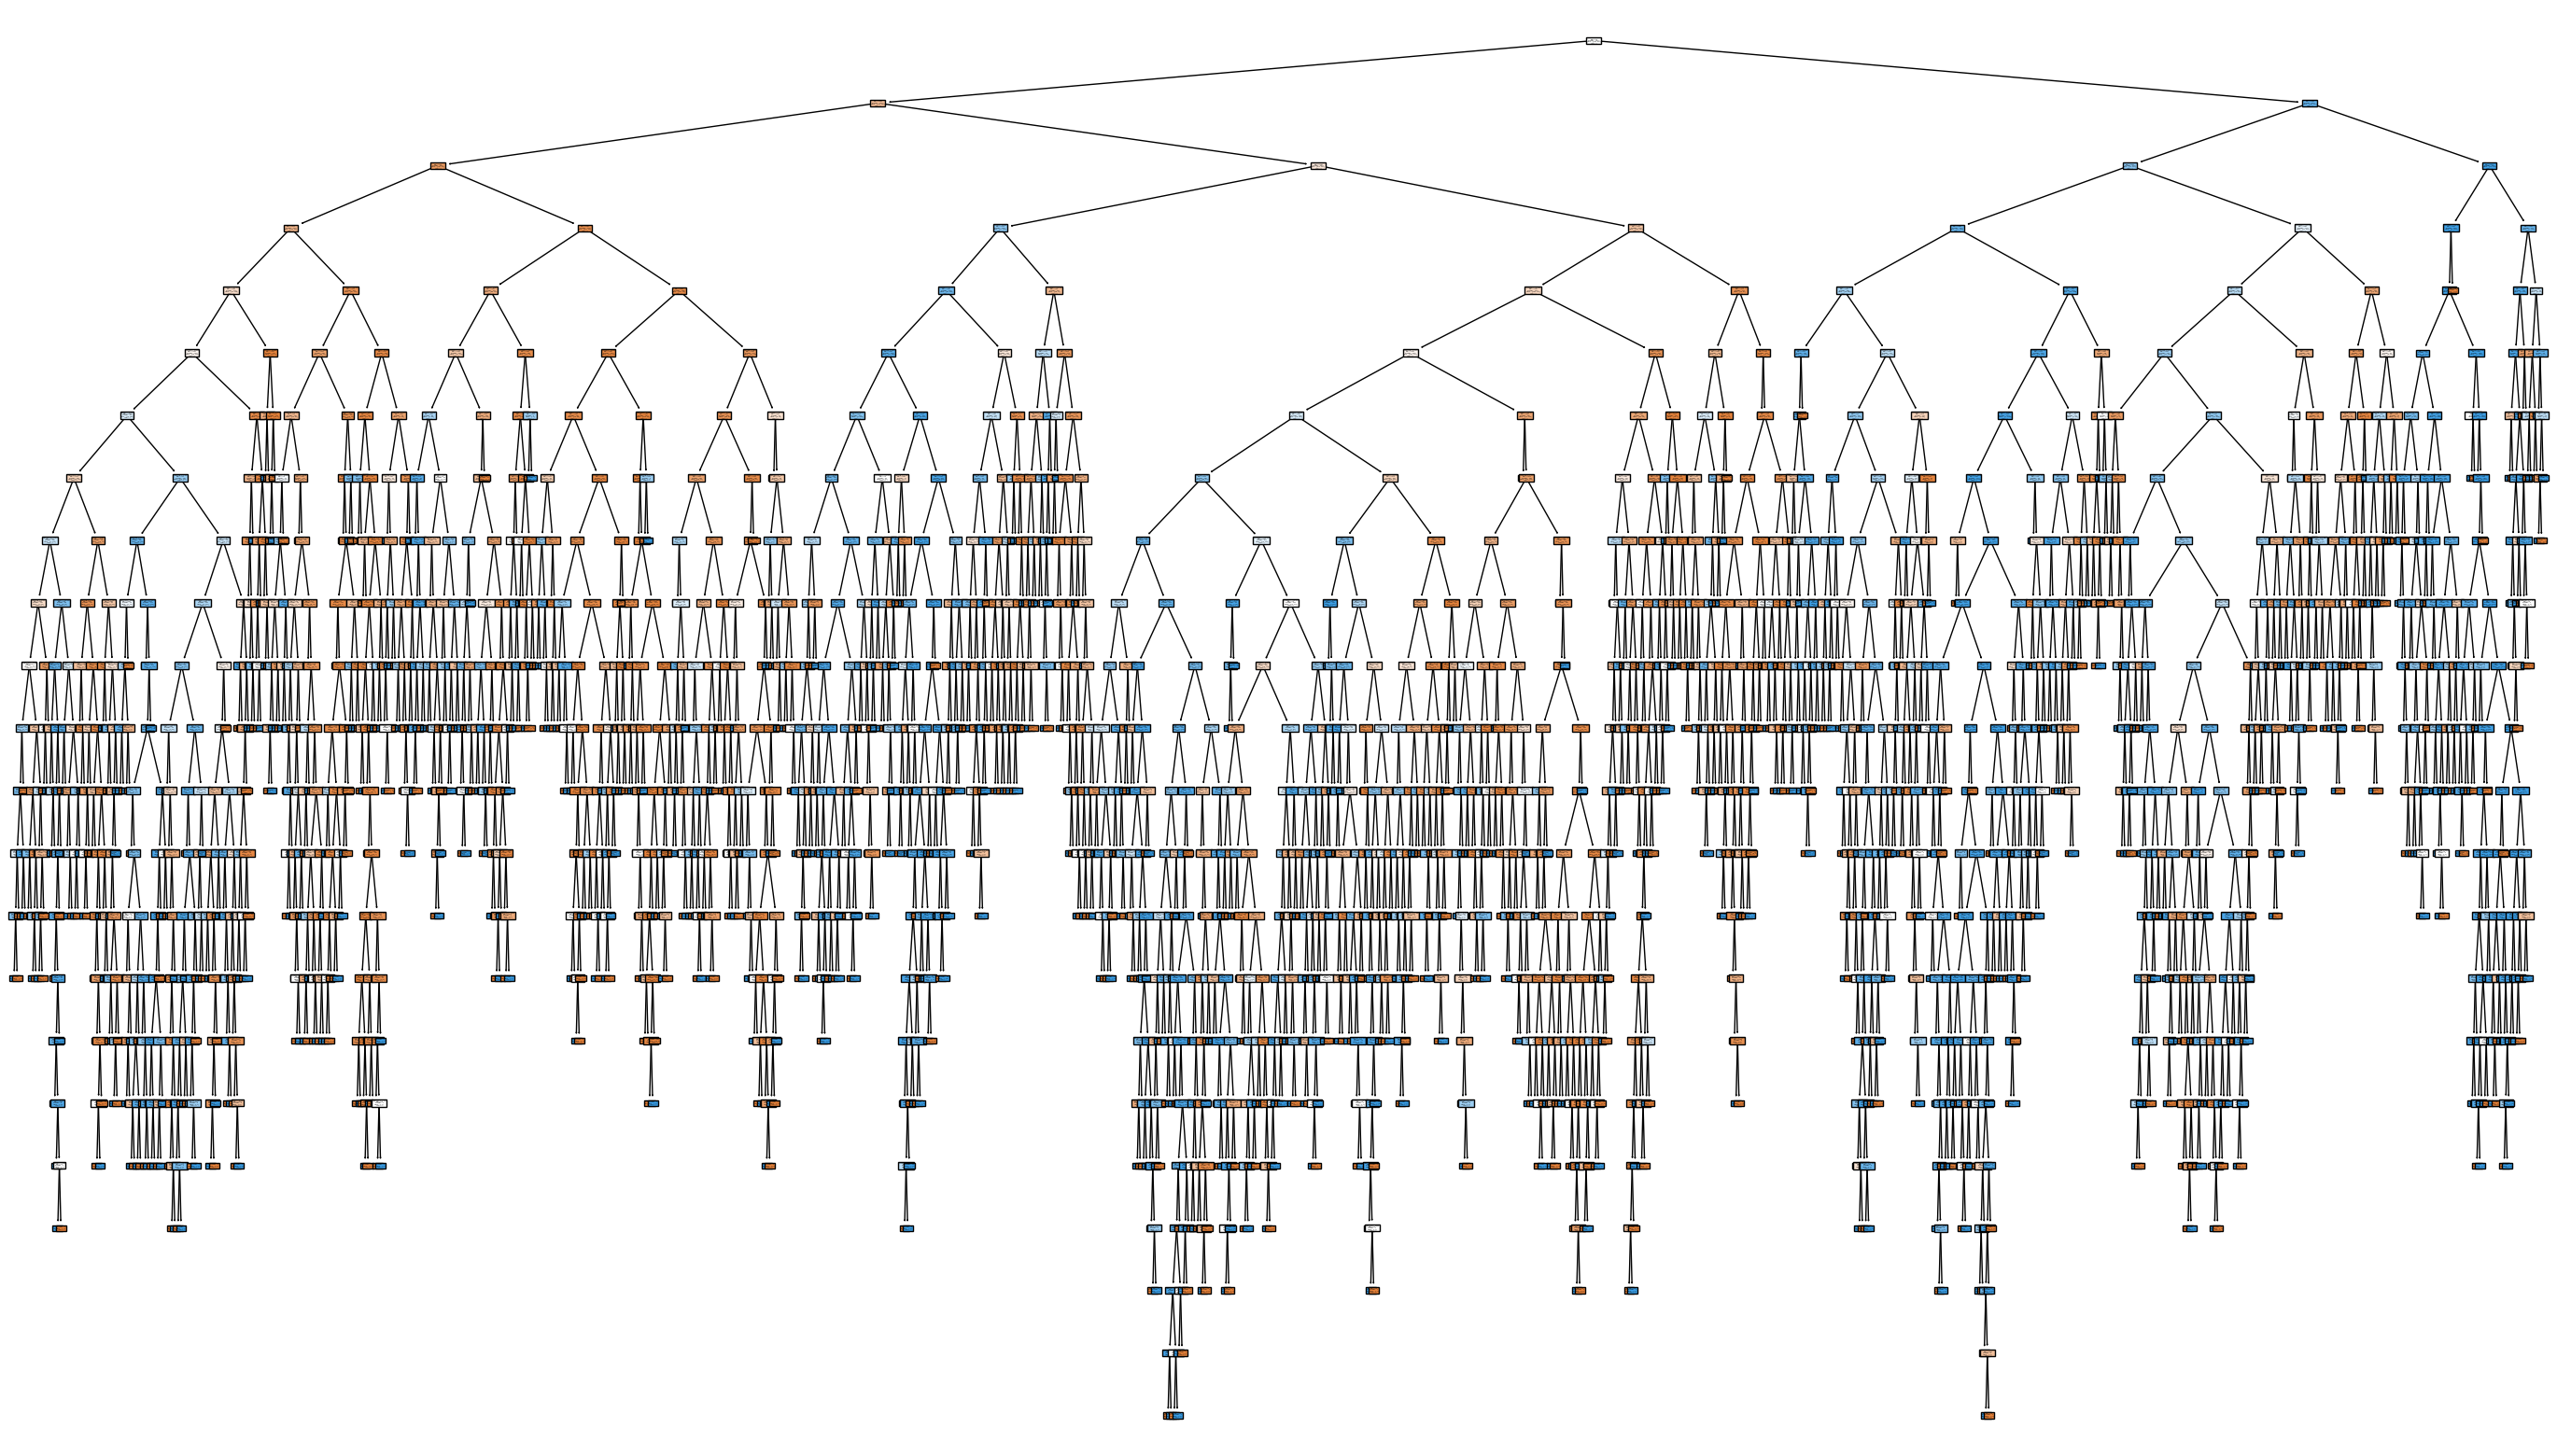

In [64]:
cd = california_housing.data.columns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35, 20))
tree.plot_tree(model, feature_names=cd, filled=True, class_names=np.unique(y).astype(str), ax=ax)
plt.show()

- Обучите модель и визуалитизируйте решение дерева

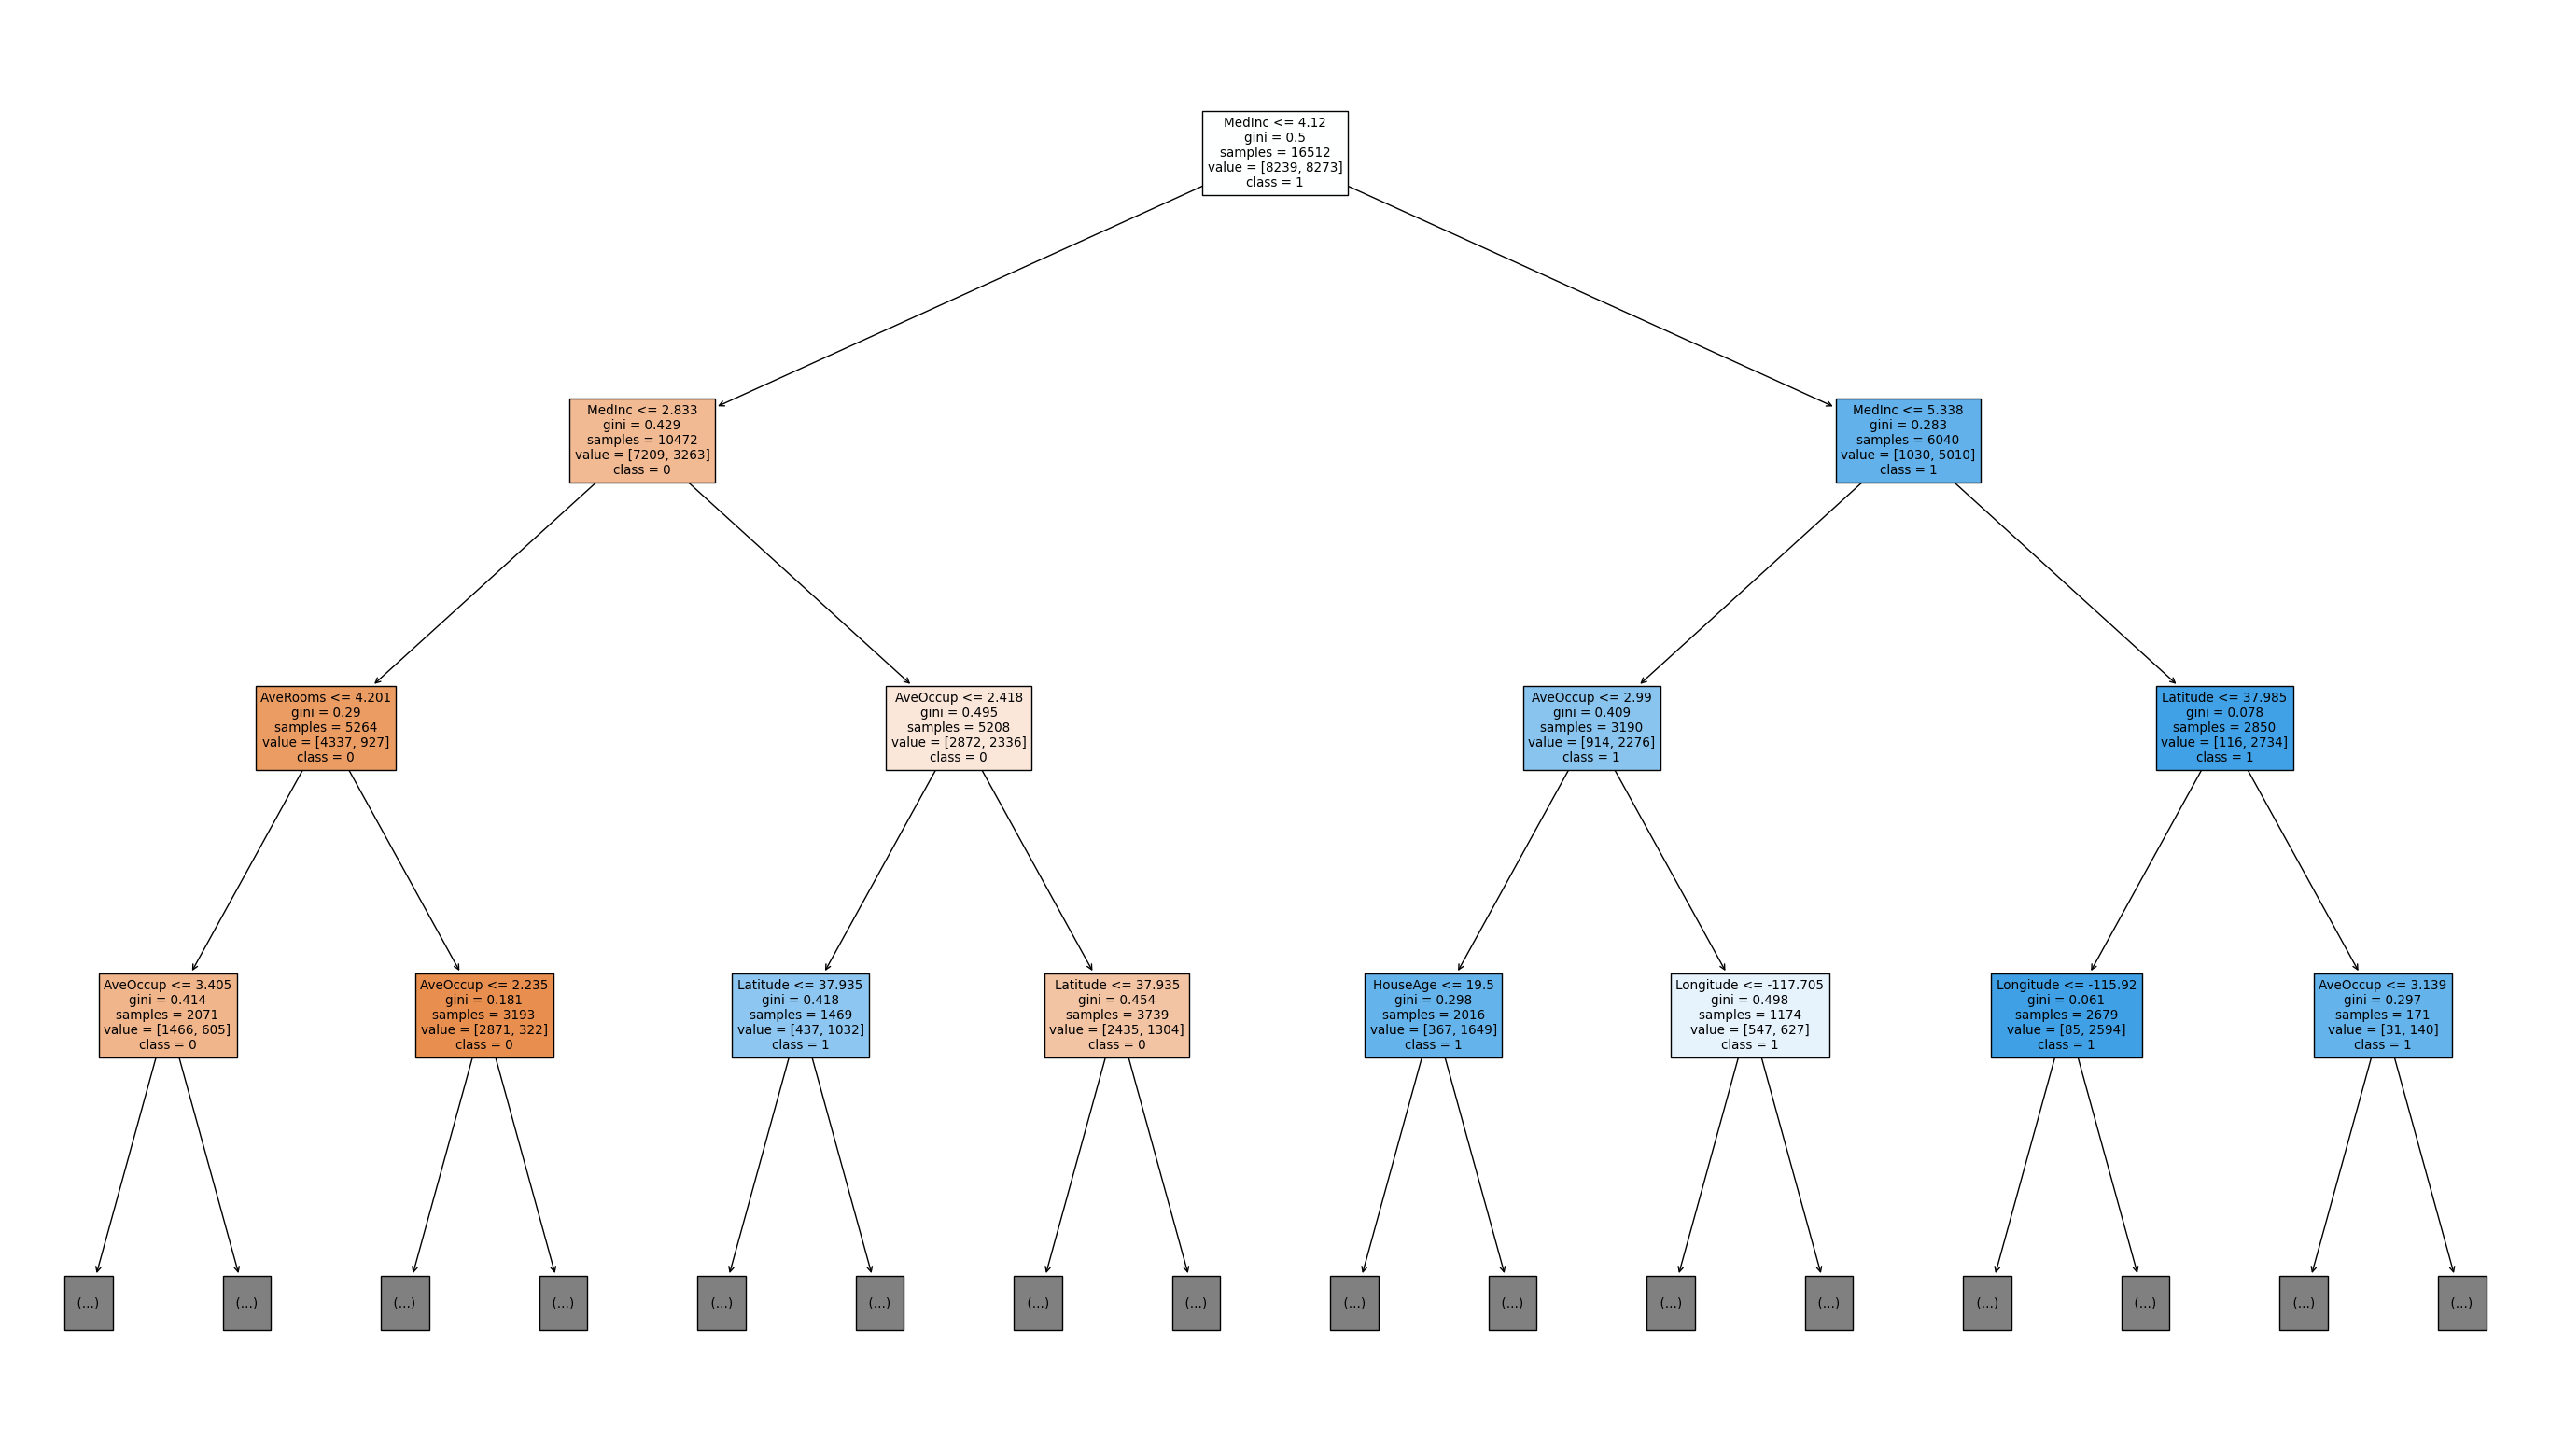

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35, 20))
tree.plot_tree(model, feature_names=cd, filled=True, class_names=np.unique(y).astype(str), ax=ax, max_depth=3)
plt.show()

In [49]:
model.score(X_test, y_test)

0.843265503875969

### 7.1 Оптимизируйте глубину дерева (use GridSearchCV или Optuna). 

In [67]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 15))
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)

gs.fit(X_train, y_train)

print("Best Parameters:", gs.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


In [68]:
gs = gs.best_params_
gs

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

- визуалитизируйте решение дерева посе подбора оптимальной глубины 

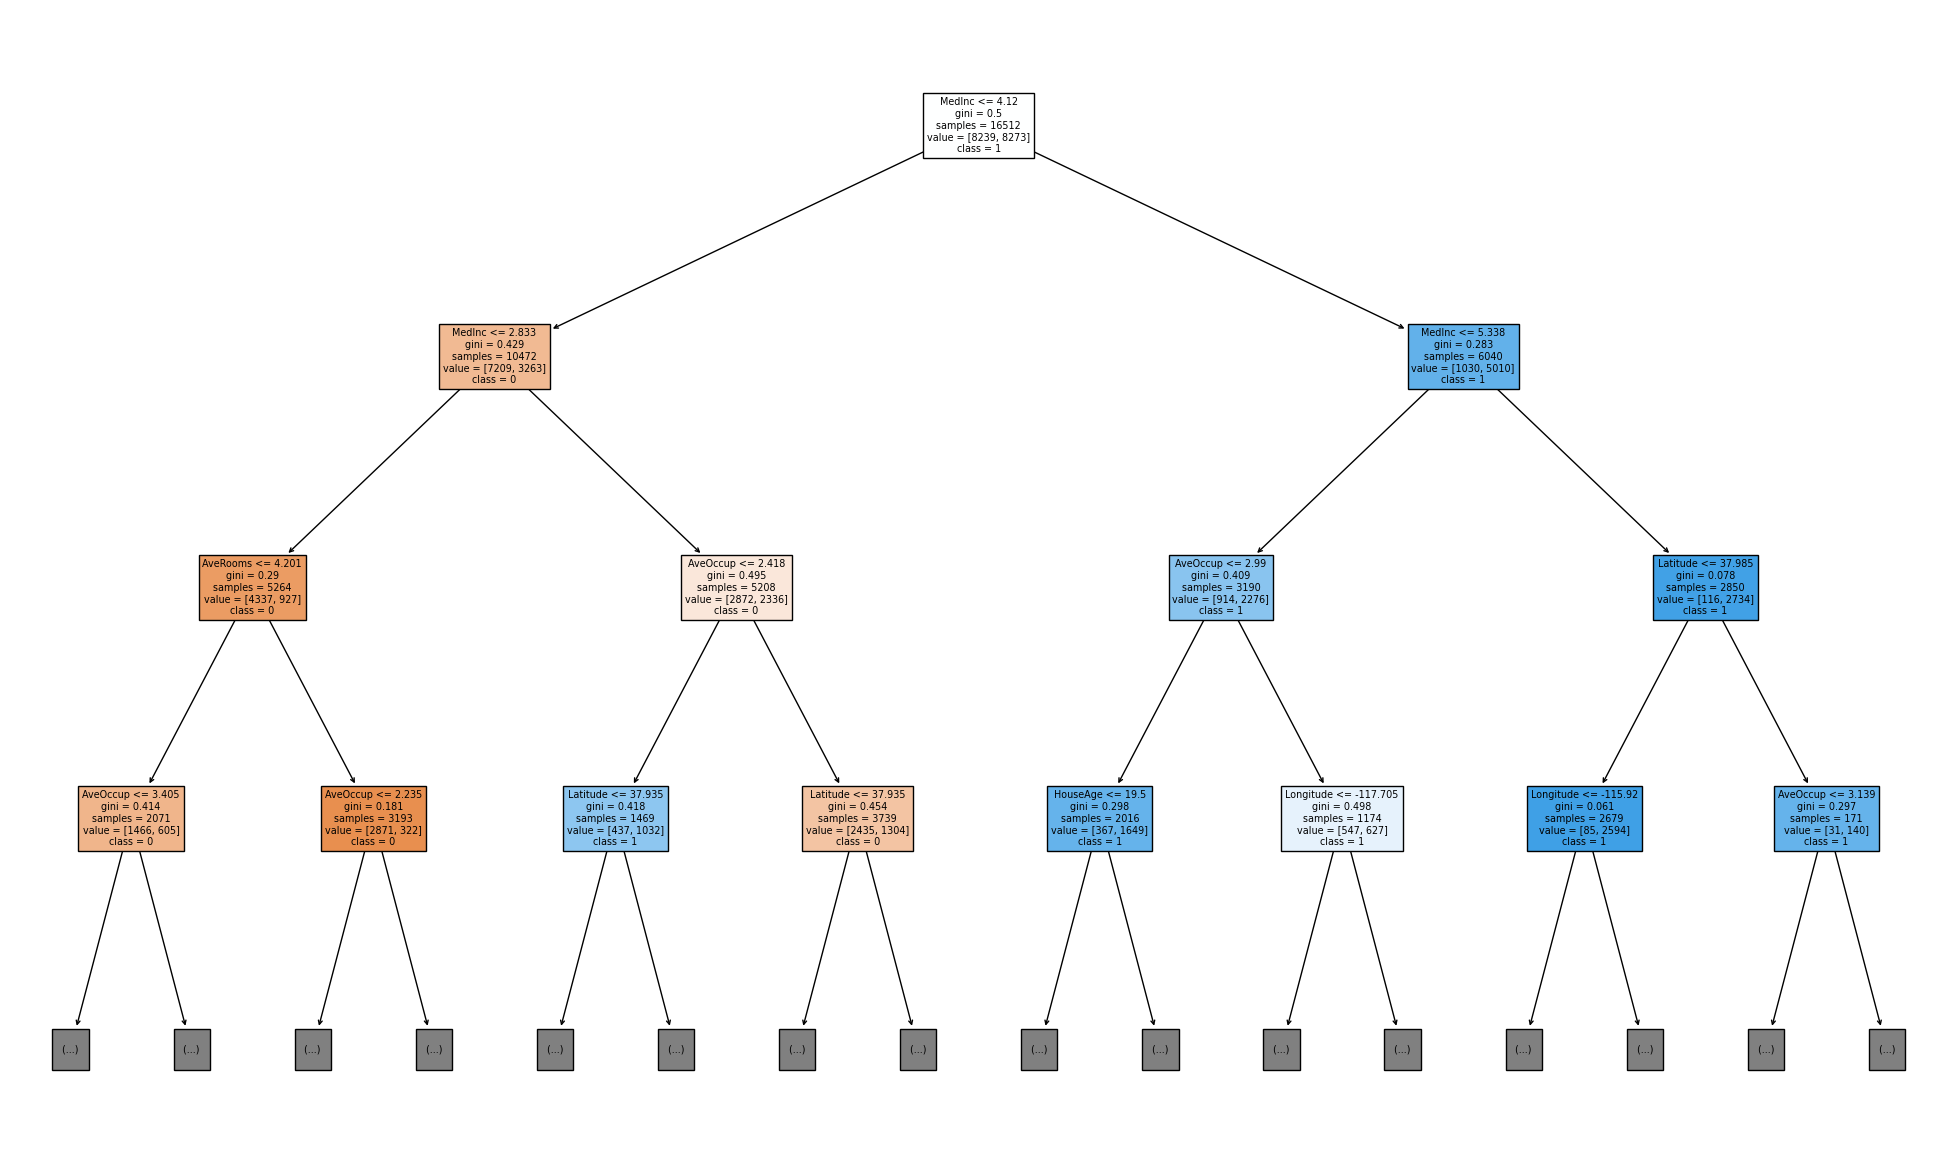

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))
tree.plot_tree(model, feature_names=cd, filled=True, class_names=np.unique(y).astype(str), max_depth=3, ax=ax)
plt.show()

### 7.2 Оптимизируйте любой другой гиперпараметр модели дерева. 

In [17]:
# Enter your code here

### 8. Cформулируйте выводы (какая модель лучше и почему, почему оптимальные гиперпараметры эти)

In [18]:
Модель логистической регрессии оказалась менее эффективной, чем дерево решений, вероятно, потому что логистическая регрессия менее чувствительна к масштабу признаков и более устойчива к наличию линейных зависимостей между переменными. Подбор гиперпараметров важен для деревьев решений, чтобы справиться с их склонностью к переобучению, что в конечном итоге влияет на качество модели.

SyntaxError: invalid syntax (246710378.py, line 1)

### 9. Decision Tree Regressor

В данном задании мы посмотрим не на результат применения [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) для сгенеренного набора данных.

Генерация данных:

In [77]:
np.random.seed(42)
m = 200
x = np.random.rand(m, 1) * 3 - 1
y = 4 * (x - 0.5) ** 3
y = y + np.random.randn(m, 1) / 10

Функция для визуализации результата (можете модифицировать).


In [78]:
def plot_regression_predictions(tree_reg, x, y, max_depth, x_range = [0, 1], 
                                y_range = [-1, 1]):
    """
    Visualize data and model predictions
    :param tree_reg: trained model,
    :param x: features
    :param y: true values
    :param max_depth: max tree depth
    :param x_range: x range
    :param y_range: y range
    """
    x_pred = np.linspace(x_range[0], x_range[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x_pred)
    bias = np.mean(y_pred)
    variance = np.var(y_pred) 

    plt.xlim(x_range)
    plt.ylim(y_range)

    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", fontsize=18, rotation=0)
    
    plt.plot(x, y, "b.", label="data")
    plt.plot(x_pred, y_pred, "r.-", linewidth=2, label=f"max_depth = {max_depth}")
    plt.legend()
    return bias, variance

Продемонстрируйте результат [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) при изменении глубины дерева (`random_state=42`). Попробуйте значения глубины $2, 5, 6, 9, 12, 15$
Используйте для визуализации те же данные, на которых происходило обучение.


Примечание: Для построения серии картинок используйте `plt.subplot`.
Пример использования: [ссылка](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html#sphx-glr-gallery-subplots-axes-and-figures-shared-axis-demo-py).

Bias for DT with depth= 2 is 0.23208717093720996
Variance for DT with depth= 2 is 6.933347799794049e-33
-------------------
Bias for DT with depth= 5 is -0.02836006467073072
Variance for DT with depth= 5 is 0.040945277805823674
-------------------
Bias for DT with depth= 6 is 0.007798296146059584
Variance for DT with depth= 6 is 0.04318297499733044
-------------------
Bias for DT with depth= 9 is 0.0031292707371389384
Variance for DT with depth= 9 is 0.046983155424358033
-------------------
Bias for DT with depth= 12 is 0.0051812358083306405
Variance for DT with depth= 12 is 0.04691296660809597
-------------------
Bias for DT with depth= 15 is 0.009028948556662548
Variance for DT with depth= 15 is 0.0482863474665747
-------------------


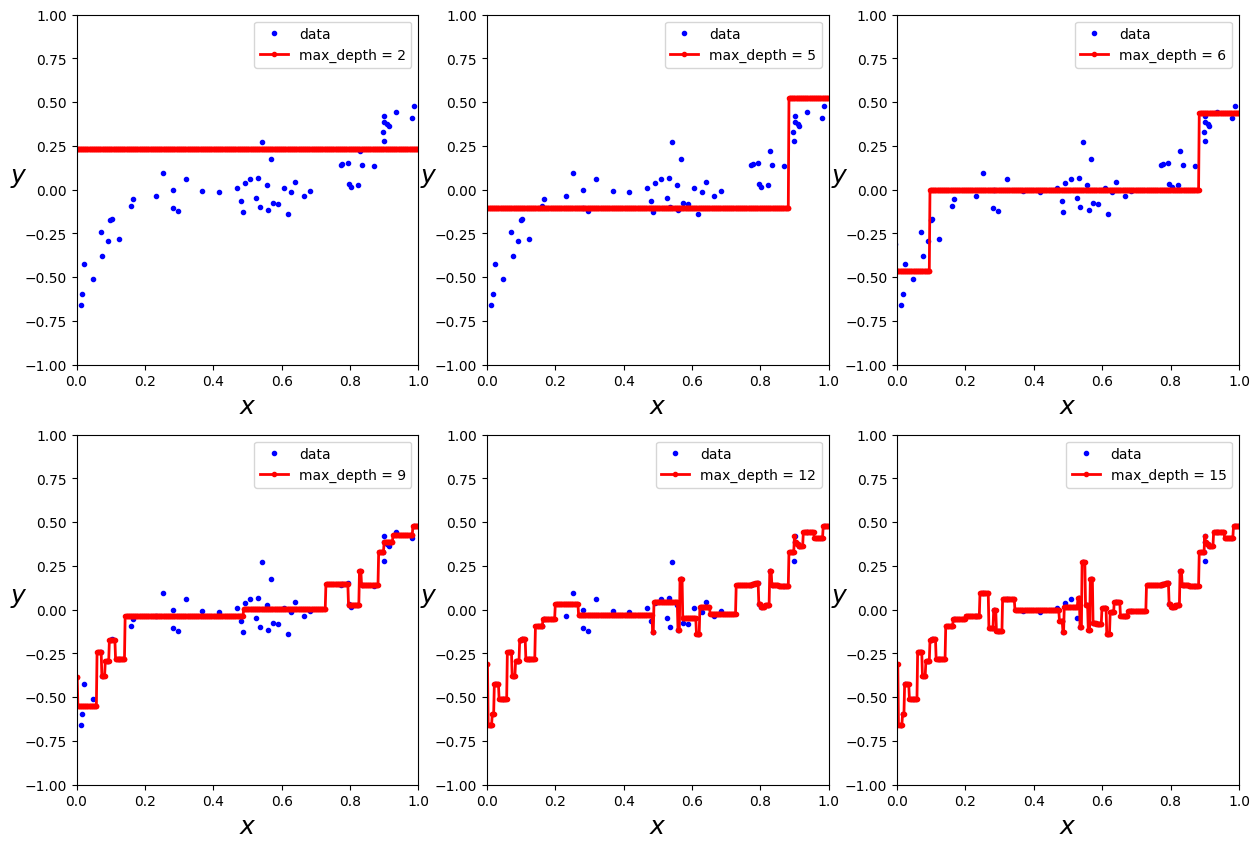

In [81]:
plt.figure(figsize=(15, 10))
tree_depths = np.array([2, 5, 6, 9, 12, 15])
tree_regs = []
biases, variances = [], []

for i, depth in enumerate(tree_depths):
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(x, y)
    tree_regs.append(tree_reg)
    plt.subplot(2, 3, i + 1)
    bias, variance = plot_regression_predictions(tree_reg, x, y, depth, x_range=[0, 1], y_range=[-1, 1])
    biases.append(bias)
    variances.append(variance)
    print('Bias for DT with depth=', depth, 'is', biases[-1])
    print('Variance for DT with depth=', depth, 'is', variances[-1])
    print('-------------------')

plt.show()

In [73]:
#from sklearn.tree import DecisionTreeRegressor
#plt.figure(figsize=(10,10))
#tree_depths = np.array([2,5,6,9,12,15])
#tree_regs =[]
#biases, variances = [],[]
#for i, depth in enumerate(tree_depths):
 #   plt.subplot(2, 3, i+1)
  #  tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
   # tree_reg.fit(X_train, y_train)
   # tree.plot_tree(tree_reg, feature_names=cd, filled=True)
   # plt.title(f"Tree Depth: {depth}")

### 10. Как изменяется при увеличении глубины дерева bias и variance модели? 

**Напишите ответ**

In [23]:
после пятерки, глубины дерева variance модели растет, а bias уменьшается

SyntaxError: invalid syntax (3802493555.py, line 1)

## Формат результата

График с демонстрацией bias-variance trade-off для `DecisionTreeRegressor` при изменении глубины дерева.

Фактически, дерево решений бьет пространство признаков с помощью плоскостей на области, и в каждой из этих областей предсказывается какая-то константная величина.